### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
df = pd.read_csv('/content/coupons.csv')

In [8]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

---



In [10]:
# Finding missing data
missing_data = df.isnull().sum()

# Print the number of missing values for each column
print(missing_data)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# Remove columns that are not essential or have too many missing entries
# Example: 'car' is irrelevant for our analysis and is mostly empty
df = df.drop(['car'], axis=1)


# Fill in the blanks in categorical fields with 'unknown' or the most common value
# Adjust column names as per your dataset
cat_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cat_cols:
    # Replace missing with 'unknown' or you can use the most frequent value
    df[col] = df[col].fillna('undisclosed')


# Verify the dataset for any missing entries post-cleanup
missing_check = df.isna().sum()
print(missing_check)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?
5. Use a bar plot to visualize the `coupon` column.





### Answer to question 4 and 5

1    56.843267
0    43.156733
Name: Y, dtype: float64


<ipython-input-16-555df090595a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_bar = sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values, palette=color_palette, ax=ax1)


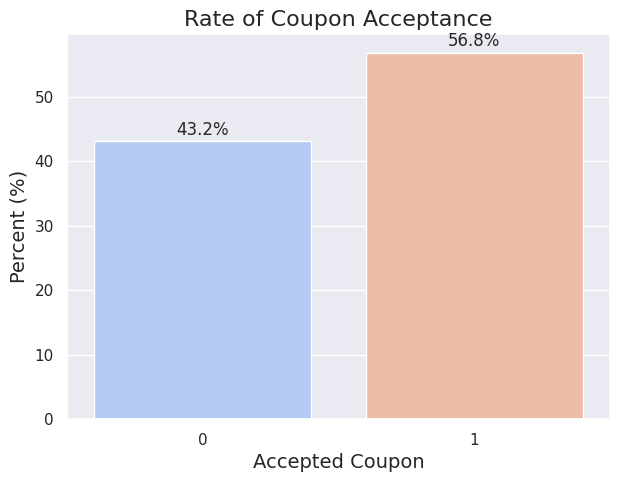

In [16]:

# Calculate proportion of those who accepted the coupon
acceptance_rates = df['Y'].value_counts(normalize=True) * 100

# Display acceptance rates
print(acceptance_rates)

# Setup for visualization
sns.set_theme(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(7, 5))
color_palette = sns.color_palette("coolwarm", n_colors=2)
sns_bar = sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values, palette=color_palette, ax=ax1)
ax1.set_title('Rate of Coupon Acceptance', fontsize=16)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.set_xlabel('Accepted Coupon', fontsize=14)

# Annotating bars with percentage values
for patch in sns_bar.patches:
    height = patch.get_height()
    sns_bar.text(patch.get_x() + patch.get_width() / 2., height + 1, f'{height:.1f}%', ha="center", fontsize=12)

plt.show()

6. Use a histogram to visualize the temperature column.

---



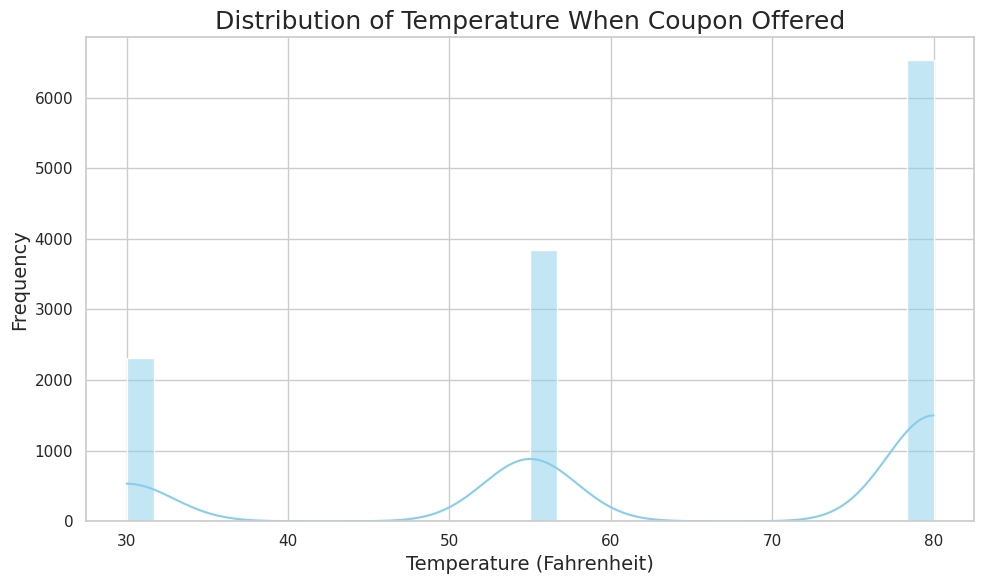

In [18]:
# Setting up the visualization style
sns.set_style("whitegrid")

# Plotting the histogram for the temperature
plt.figure(figsize=(10, 6))
temp_plot = sns.histplot(df['temperature'], bins=30, kde=True, color="skyblue")
temp_plot.set_title('Distribution of Temperature When Coupon Offered', fontsize=18)
temp_plot.set_xlabel('Temperature (Fahrenheit)', fontsize=14)
temp_plot.set_ylabel('Frequency', fontsize=14)

# Enhance layout for better readability
plt.tight_layout()

# Show the plot
plt.show()



```
This is formatted as code
```

**Investigating the Bar Coupons**
Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
# Filter for bar coupons
bar_coupons_only = df[df['coupon'].str.contains("Bar")]

# Display the first few rows to verify
print(bar_coupons_only.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse    CarryAway  \
9   Female  21  Unmarried partner  ...        never  undisclosed   
13  Female  21  Unmarried partner  ...        never  undisclosed   
17  Female  21  Unmarried partner  ...        never  undisclosed   
24    Male  21             Single  ...        less1          4~8   
35    Male  21             Single  ...        less1          4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              

2. What proportion of bar coupons were accepted?





<ipython-input-23-af6e99f24559>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  acceptance_plot = sns.barplot(x=bar_coupon_acceptance.index, y=bar_coupon_acceptance.values, palette="viridis")


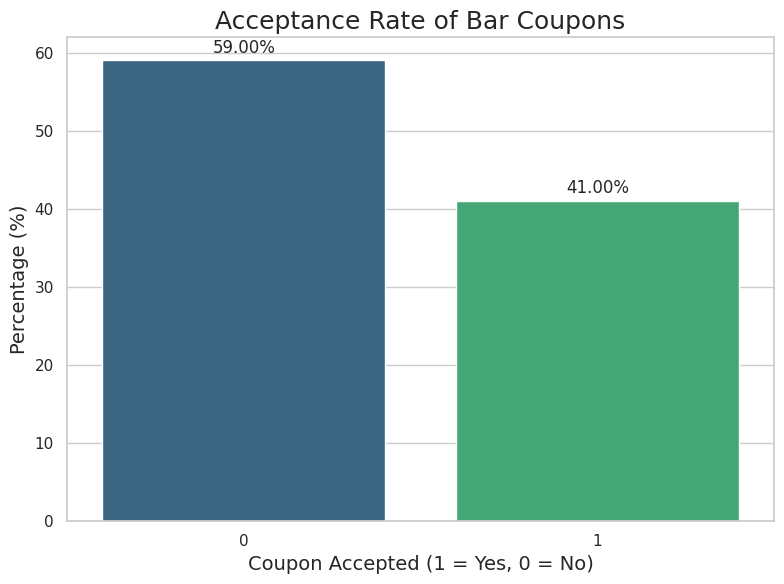

In [23]:
bar_coupon_acceptance = bar_coupons_only['Y'].value_counts(normalize=True) * 100

bar_coupon_acceptance

plt.figure(figsize=(8, 6))
acceptance_plot = sns.barplot(x=bar_coupon_acceptance.index, y=bar_coupon_acceptance.values, palette="viridis")
acceptance_plot.set_title('Acceptance Rate of Bar Coupons', fontsize=18)
acceptance_plot.set_ylabel('Percentage (%)', fontsize=14)
acceptance_plot.set_xlabel('Coupon Accepted (1 = Yes, 0 = No)', fontsize=14)

# Annotating the percentage on the bars
for p in acceptance_plot.patches:
    height = p.get_height()
    acceptance_plot.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.2f}%', ha="center", fontsize=12)

plt.tight_layout()
plt.show()

:3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.





<ipython-input-24-3c00dc76ebfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_only['Bar_Frequency_Group'] = bar_coupons_only['Bar'].map(
<ipython-input-24-3c00dc76ebfd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_rate_by_bar_frequency.index, y=acceptance_rate_by_bar_frequency.values, palette="coolwarm")


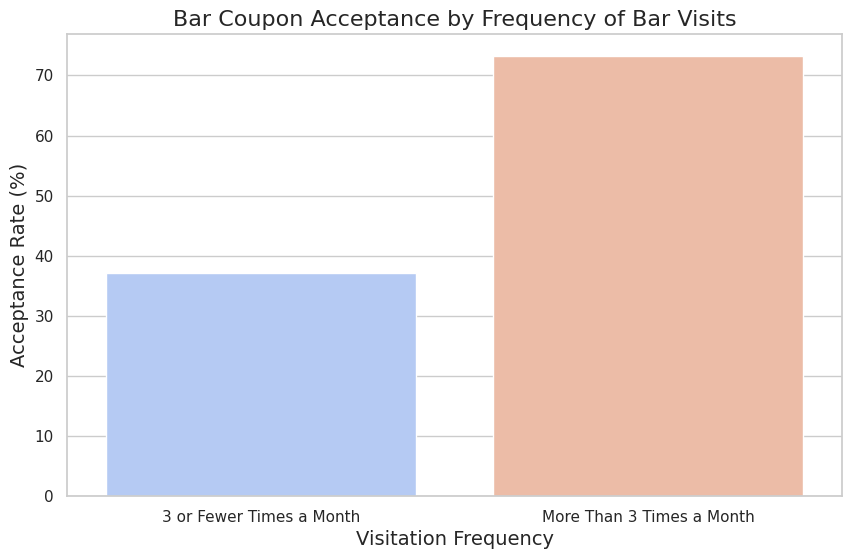

In [24]:
# Categorizing 'Bar' visits into two groups
bar_coupons_only['Bar_Frequency_Group'] = bar_coupons_only['Bar'].map(
    lambda x: '3_or_fewer' if x in ['never', 'less1', '1~3'] else 'more_than_3'
)

# Calculate acceptance rate within each group
acceptance_rate_by_bar_frequency = bar_coupons_only.groupby('Bar_Frequency_Group')['Y'].mean() * 100

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_by_bar_frequency.index, y=acceptance_rate_by_bar_frequency.values, palette="coolwarm")
plt.title('Bar Coupon Acceptance by Frequency of Bar Visits', fontsize=16)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.xlabel('Visitation Frequency', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['3 or Fewer Times a Month', 'More Than 3 Times a Month'])

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<ipython-input-27-fe8ad5781bc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_only['target_group'] = bar_coupons_only.apply(lambda x: 'Over 25 & Visits > 1x'


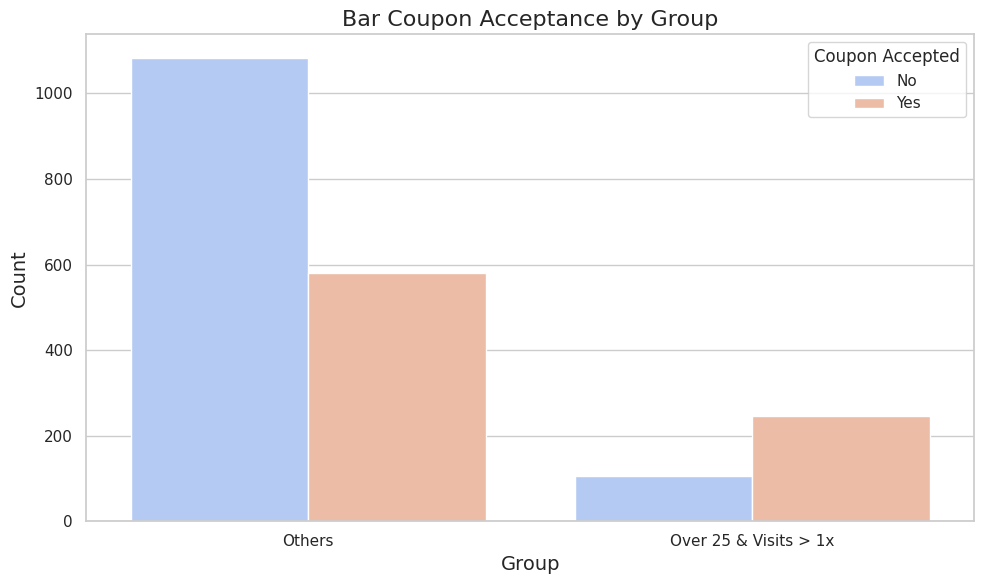

In [27]:
# Categorize drivers based on the criteria: more than once a month and over the age of 25
bar_coupons_only['target_group'] = bar_coupons_only.apply(lambda x: 'Over 25 & Visits > 1x'
                                                          if (x['Bar'] in ['1~3', '4~8', 'gt8'] and
                                                              pd.to_numeric(x['age'], errors='coerce') > 25)
                                                          else 'Others', axis=1)

# Visual comparison using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='target_group', hue='Y', data=bar_coupons_only, palette='coolwarm')
plt.title('Bar Coupon Acceptance by Group', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Group', fontsize=14)
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'], loc='upper right')

plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


<ipython-input-29-4af4f83279b5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate_names, y=rate_values, palette='cool')


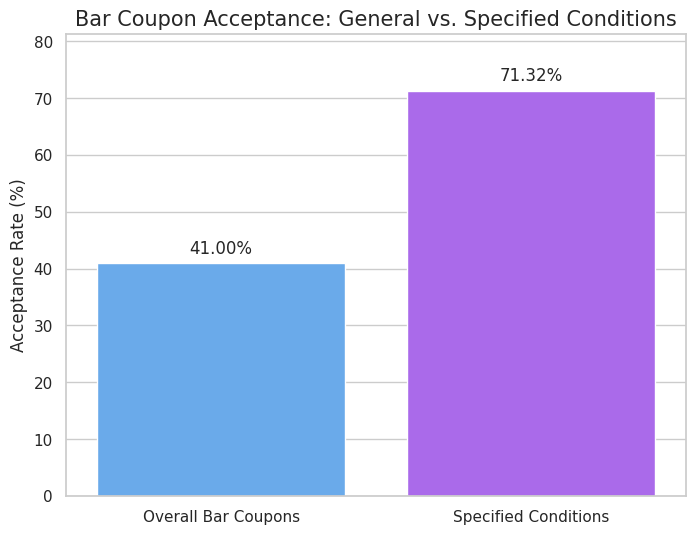

In [29]:
# Apply filters for the specified conditions directly on bar_coupons_only
filtered_coupons = bar_coupons_only[
    (bar_coupons_only['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_only['passanger'] != 'Kid(s)') &
    (~bar_coupons_only['occupation'].str.contains('Farming|Fishing|Forestry', regex=True))
]

# Calculate acceptance rates
overall_acceptance_rate = bar_coupons_only['Y'].mean() * 100
filtered_acceptance_rate = filtered_coupons['Y'].mean() * 100

# Visualize the comparison
rates = {'Overall Bar Coupons': overall_acceptance_rate, 'Specified Conditions': filtered_acceptance_rate}
rate_names = list(rates.keys())
rate_values = list(rates.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=rate_names, y=rate_values, palette='cool')
plt.title('Bar Coupon Acceptance: General vs. Specified Conditions', fontsize=15)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.ylim(0, max(rate_values) + 10)  # Adjusting the y-axis limit for better visualization

# Annotate the bars with the percentage
for i, rate in enumerate(rate_values):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom')

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



<ipython-input-32-f97d0c58b758>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_only['Group'] = bar_coupons_only.apply(categorize_row, axis=1)
<ipython-input-32-f97d0c58b758>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


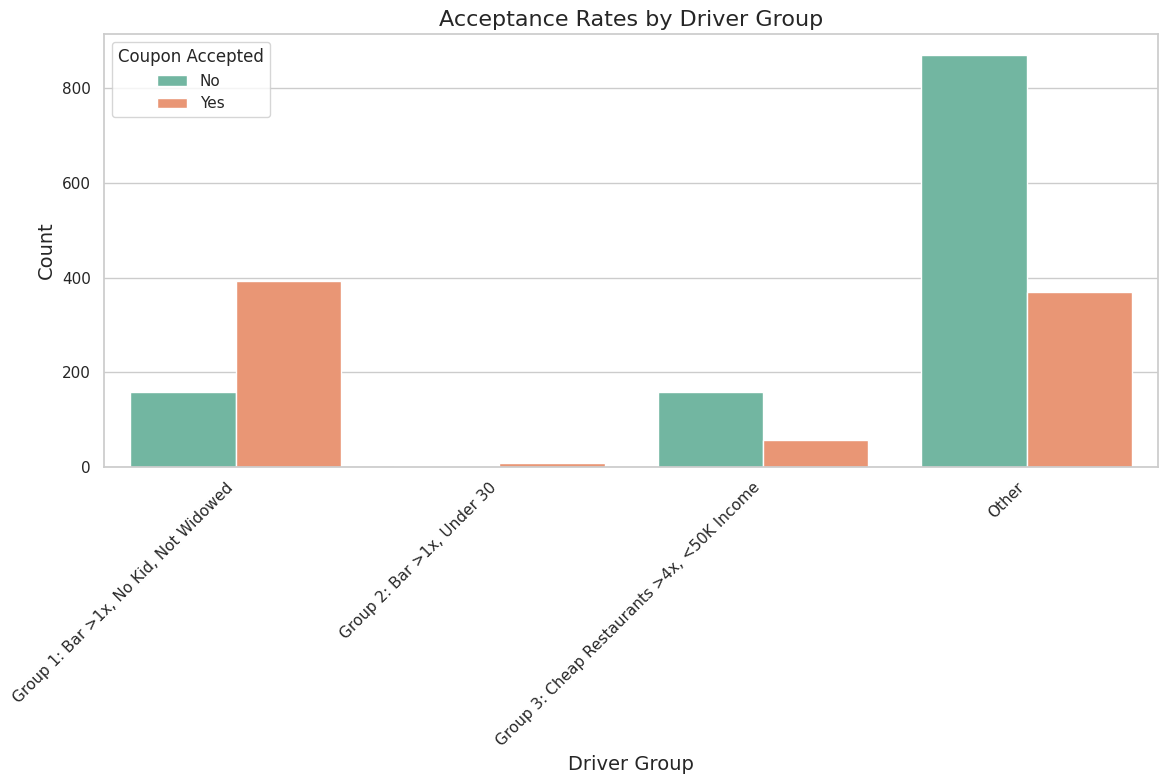

In [32]:

def categorize_row(row):
    more_than_once_bar = row['Bar'] in ['1~3', '4~8', 'gt8']
    not_kid_passenger = row['passanger'] != 'Kid(s)'
    not_widowed = row['maritalStatus'] != 'Widowed'
    under_30 = pd.to_numeric(row['age'].replace('below21', '20').replace('50plus', '50'), errors='coerce') < 30
    goes_to_cheap_restaurants = row['RestaurantLessThan20'] in ['4~8', 'gt8']
    income_less_50k = row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

    if more_than_once_bar and not_kid_passenger and not_widowed:
        return 'Group 1: Bar >1x, No Kid, Not Widowed'
    elif more_than_once_bar and under_30:
        return 'Group 2: Bar >1x, Under 30'
    elif goes_to_cheap_restaurants and income_less_50k:
        return 'Group 3: Cheap Restaurants >4x, <50K Income'
    else:
        return 'Other'

# Apply the categorization
bar_coupons_only['Group'] = bar_coupons_only.apply(categorize_row, axis=1)

# Visualize the acceptance rates for each group
plt.figure(figsize=(12, 8))
group_order = ['Group 1: Bar >1x, No Kid, Not Widowed', 'Group 2: Bar >1x, Under 30', 'Group 3: Cheap Restaurants >4x, <50K Income', 'Other']
sns_plot = sns.countplot(x='Group', hue='Y', data=bar_coupons_only, order=group_order, palette='Set2')
sns_plot.set_title('Acceptance Rates by Driver Group', fontsize=16)
sns_plot.set_ylabel('Count', fontsize=14)
sns_plot.set_xlabel('Driver Group', fontsize=14)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?




Analyzing the chart, it seems:

1. Regular bar-goers sans kids or spousal loss show a mixed response to coupons, hinting at varied interests or other unseen influences swaying their decisions.
   
2. The under-30 crowd, hitting bars often, appears keener on coupon use, possibly chasing vibrant social scenes or cost-effective outings.

3. Those dining out affordably with tighter budgets seem less swayed by bar deals, perhaps prioritizing value dining over bar scenes.

4. The 'Other' group's coupon uptake is lower, indicating a broader array of factors might be at play beyond the specific traits examined.

In essence, youthful and frequent bar visitors are more enticed by bar coupons, while budget dining habits and less defined demographics seem less influenced by such offers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

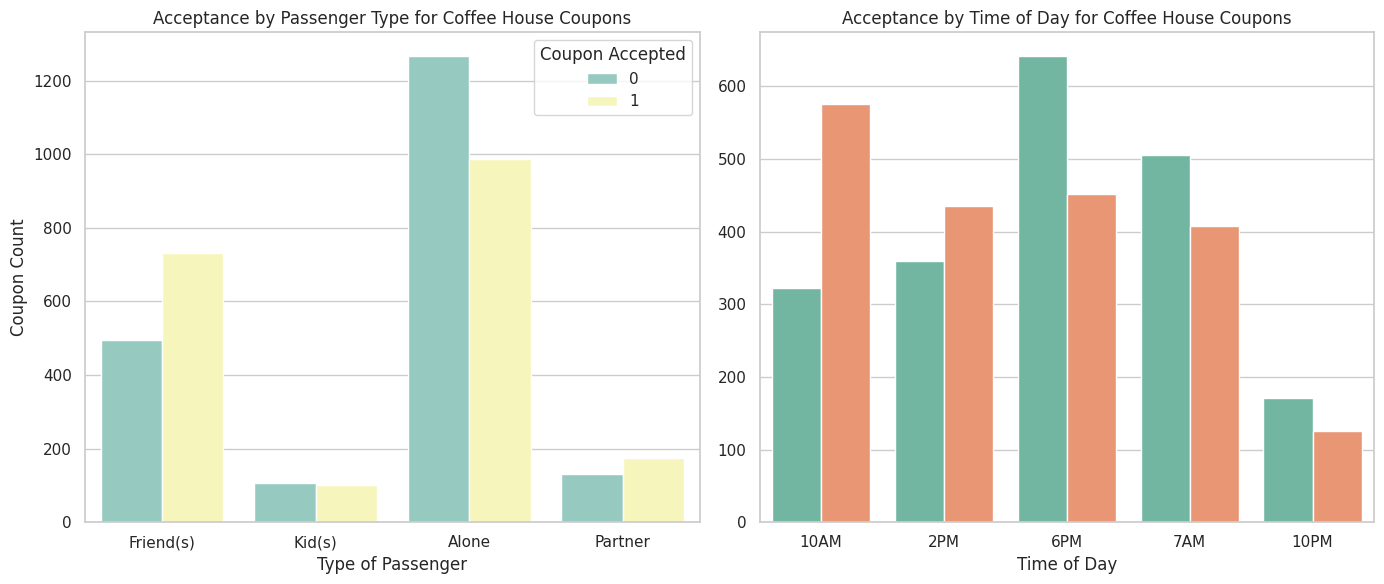

In [35]:


# Filter for Coffee House coupons
coffee_house_coupons = df[df['coupon'].str.contains("Coffee House")]

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure for subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Passenger type acceptance rate
passenger_ax = sns.countplot(ax=ax[0], x='passanger', hue='Y', data=coffee_house_coupons, palette='Set3')
passenger_ax.set_title('Acceptance by Passenger Type for Coffee House Coupons')
passenger_ax.set_xlabel('Type of Passenger')
passenger_ax.set_ylabel('Coupon Count')
passenger_ax.legend(title='Coupon Accepted')

# Time of day acceptance rate
time_ax = sns.countplot(ax=ax[1], x='time', hue='Y', data=coffee_house_coupons, palette='Set2')
time_ax.set_title('Acceptance by Time of Day for Coffee House Coupons')
time_ax.set_xlabel('Time of Day')
time_ax.set_ylabel('')  # The y-axis label is not needed here as it's the same as for the first plot
time_ax.legend([],[], frameon=False)  # Hide the legend for the second plot

# Adjust layout for a better fit
plt.tight_layout()

# Display the plot
plt.show()

1. Solo drivers show the highest likelihood of accepting coffee house coupons, suggesting a preference for coffee breaks when alone.

2. Friends in the car also lead to a good number of acceptances, hinting at social coffee sessions being popular.

3. Passengers with partners or kids are less likely to redeem coupons, possibly due to family dynamics or collective preferences.

4. The morning rush at 10AM sees the highest coupon acceptance, aligning with common coffee-drinking habits.

5. Afternoon and early evening times also experience a surge, indicating a trend for midday or post-work coffee runs.

6. Early birds at 7AM and night owls at 10PM are less likely to engage with coffee offers, perhaps due to off-peak coffee times.